In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

In [3]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_byDate1.xlsx', sheet_name='Sheet1')
df.head()

,exp,sample,trt_time,orient,spectra_num,details,752.901,754.044,755.187,756.329,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,-0.004580,0.014198,0.033234,0.052258,...,0.063764,0.060871,0.058869,0.058241,0.058690,0.060554,0.064038,0.069348,0.076688,0.086265
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,-0.002485,0.054030,0.099156,0.134131,...,0.089793,0.091843,0.094528,0.097768,0.101272,0.104856,0.108352,0.111590,0.114402,0.116619
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,-0.006735,0.049518,0.097465,0.137848,...,0.305150,0.310110,0.314895,0.319764,0.324469,0.329269,0.334224,0.339393,0.344836,0.350614
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,0.016831,0.032360,0.041923,0.046839,...,0.140087,0.142750,0.144948,0.146399,0.147567,0.148977,0.150814,0.153261,0.156503,0.160724
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,-0.002913,0.041236,0.079787,0.113092,...,0.222366,0.224526,0.226351,0.227929,0.229314,0.230770,0.232435,0.234444,0.236937,0.240051


In [47]:
df[(df['orient'] == 'Para')].groupby(['sample']).mean(numeric_only=True).reset_index().to_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Para_mean_spectra.csv', index = False)

In [4]:
df_mean = df.groupby(['sample', 'trt_time', 'orient']).mean(numeric_only = True).reset_index()
df_mean.head()

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,20mins,Orth,2.025055e+07,4.900000,0.014324,0.047562,0.076111,0.100397,0.120848,...,0.135084,0.135973,0.136873,0.137851,0.138958,0.140152,0.141424,0.142772,0.144197,0.145697
1,Ctrl,20mins,Para,2.025056e+07,5.156250,0.075049,0.097825,0.116468,0.131388,0.142992,...,0.086668,0.087030,0.087352,0.087380,0.087234,0.086982,0.086689,0.086399,0.086156,0.086006
2,Ctrl,24h,Orth,2.025056e+07,4.774194,0.025840,0.052176,0.075603,0.096321,0.114533,...,0.149280,0.151817,0.154239,0.156544,0.158723,0.160747,0.162550,0.164088,0.165318,0.166195
3,Ctrl,24h,Para,2.025056e+07,4.774194,0.056913,0.079699,0.098853,0.114724,0.127659,...,0.126741,0.129312,0.131469,0.133227,0.134569,0.135645,0.136496,0.137153,0.137651,0.138021
4,Ctrl,2mins,Orth,2.025056e+07,7.181818,0.026375,0.048292,0.068571,0.087194,0.104145,...,0.116270,0.117292,0.118188,0.118877,0.119464,0.120035,0.120635,0.121299,0.122066,0.122974


In [5]:
ctrl_mean = df_mean[(df_mean['sample'] == 'Ctrl')].groupby(['orient']).mean(numeric_only = True).reset_index()
ctrl_mean.insert(0, 'sample', 'Ctrl')
ctrl_mean.insert(1, 'trt_time', '0mins')
ctrl_mean.head()

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0mins,Orth,2.025056e+07,5.436794,0.017081,0.044847,0.069679,0.091749,0.111227,...,0.144949,0.146463,0.147858,0.149146,0.150338,0.151441,0.152449,0.153359,0.154168,0.154872
1,Ctrl,0mins,Para,2.025056e+07,4.745444,0.075169,0.095521,0.112656,0.126843,0.138351,...,0.107524,0.108182,0.108717,0.109103,0.109323,0.109538,0.109847,0.110324,0.111045,0.112085


In [6]:
df_mean1 = pd.concat([ctrl_mean, df_mean[(df_mean['sample'] != 'Ctrl')]], axis=0)

In [129]:
sub = df_mean1[(df_mean1['orient'] == j)].reset_index(drop=True)

In [134]:
sub['trt_time'] = pd.Categorical(sub['trt_time'], categories= ['0mins',   '2mins',  '20mins',     '40mins',    '60mins',  '24h',        
'2mins24h',  '20mins24h',  '40mins24h', '60mins24h'])
sub.sort_values('trt_time')

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0mins,Para,2.025056e+07,4.745444,0.075169,0.095521,0.112656,0.126843,0.138351,...,0.107524,0.108182,0.108717,0.109103,0.109323,0.109538,0.109847,0.110324,0.111045,0.112085
3,Trt,2mins,Para,2.025055e+07,4.333333,0.118013,0.130218,0.141092,0.150698,0.159097,...,0.110240,0.109917,0.109549,0.109110,0.108559,0.108071,0.107727,0.107609,0.107798,0.108374
1,Trt,20mins,Para,2.025055e+07,4.766667,0.134951,0.148352,0.160421,0.171173,0.180624,...,0.137869,0.138319,0.138505,0.138596,0.138606,0.138396,0.137981,0.137350,0.136491,0.135396
4,Trt,40mins,Para,2.025055e+07,4.896552,0.195456,0.203140,0.209759,0.215318,0.219823,...,0.165738,0.165762,0.165766,0.165600,0.165291,0.165074,0.165196,0.165815,0.167088,0.169171
5,Trt,60mins,Para,2.025055e+07,4.966667,0.141009,0.158209,0.171976,0.182631,0.190492,...,0.159455,0.158876,0.158851,0.158784,0.158829,0.159095,0.159714,0.160786,0.162405,0.164671
2,Trt,24h,Para,2.025056e+07,9.548387,0.172696,0.177318,0.183414,0.190600,0.198493,...,0.152721,0.150936,0.148748,0.146246,0.143645,0.141182,0.138883,0.136860,0.135222,0.134080
7,Trt_24h,2mins24h,Para,2.025055e+07,4.900000,0.120687,0.137242,0.150445,0.160626,0.168116,...,0.113846,0.116106,0.117927,0.119514,0.120614,0.121257,0.121482,0.121277,0.120633,0.119540
6,Trt_24h,20mins24h,Para,2.025056e+07,5.235294,0.140907,0.154319,0.164983,0.173170,0.179151,...,0.120928,0.121970,0.123203,0.124437,0.125807,0.127212,0.128581,0.129869,0.131030,0.132016
8,Trt_24h,40mins24h,Para,2.025056e+07,6.351351,0.140279,0.158489,0.173743,0.186281,0.196345,...,0.122967,0.123061,0.122772,0.122072,0.121429,0.120941,0.120755,0.121012,0.121855,0.123424
9,Trt_24h,60mins24h,Para,2.025056e+07,4.878788,0.100217,0.124748,0.145569,0.162900,0.176964,...,0.109029,0.110547,0.111620,0.112332,0.112731,0.112745,0.112283,0.111290,0.109715,0.107501


In [140]:
sub

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0mins,Para,2.025056e+07,4.745444,0.075169,0.095521,0.112656,0.126843,0.138351,...,0.107524,0.108182,0.108717,0.109103,0.109323,0.109538,0.109847,0.110324,0.111045,0.112085
1,Trt,20mins,Para,2.025055e+07,4.766667,0.134951,0.148352,0.160421,0.171173,0.180624,...,0.137869,0.138319,0.138505,0.138596,0.138606,0.138396,0.137981,0.137350,0.136491,0.135396
2,Trt,24h,Para,2.025056e+07,9.548387,0.172696,0.177318,0.183414,0.190600,0.198493,...,0.152721,0.150936,0.148748,0.146246,0.143645,0.141182,0.138883,0.136860,0.135222,0.134080
3,Trt,2mins,Para,2.025055e+07,4.333333,0.118013,0.130218,0.141092,0.150698,0.159097,...,0.110240,0.109917,0.109549,0.109110,0.108559,0.108071,0.107727,0.107609,0.107798,0.108374
4,Trt,40mins,Para,2.025055e+07,4.896552,0.195456,0.203140,0.209759,0.215318,0.219823,...,0.165738,0.165762,0.165766,0.165600,0.165291,0.165074,0.165196,0.165815,0.167088,0.169171
5,Trt,60mins,Para,2.025055e+07,4.966667,0.141009,0.158209,0.171976,0.182631,0.190492,...,0.159455,0.158876,0.158851,0.158784,0.158829,0.159095,0.159714,0.160786,0.162405,0.164671
6,Trt_24h,20mins24h,Para,2.025056e+07,5.235294,0.140907,0.154319,0.164983,0.173170,0.179151,...,0.120928,0.121970,0.123203,0.124437,0.125807,0.127212,0.128581,0.129869,0.131030,0.132016
7,Trt_24h,2mins24h,Para,2.025055e+07,4.900000,0.120687,0.137242,0.150445,0.160626,0.168116,...,0.113846,0.116106,0.117927,0.119514,0.120614,0.121257,0.121482,0.121277,0.120633,0.119540
8,Trt_24h,40mins24h,Para,2.025056e+07,6.351351,0.140279,0.158489,0.173743,0.186281,0.196345,...,0.122967,0.123061,0.122772,0.122072,0.121429,0.120941,0.120755,0.121012,0.121855,0.123424
9,Trt_24h,60mins24h,Para,2.025056e+07,4.878788,0.100217,0.124748,0.145569,0.162900,0.176964,...,0.109029,0.110547,0.111620,0.112332,0.112731,0.112745,0.112283,0.111290,0.109715,0.107501


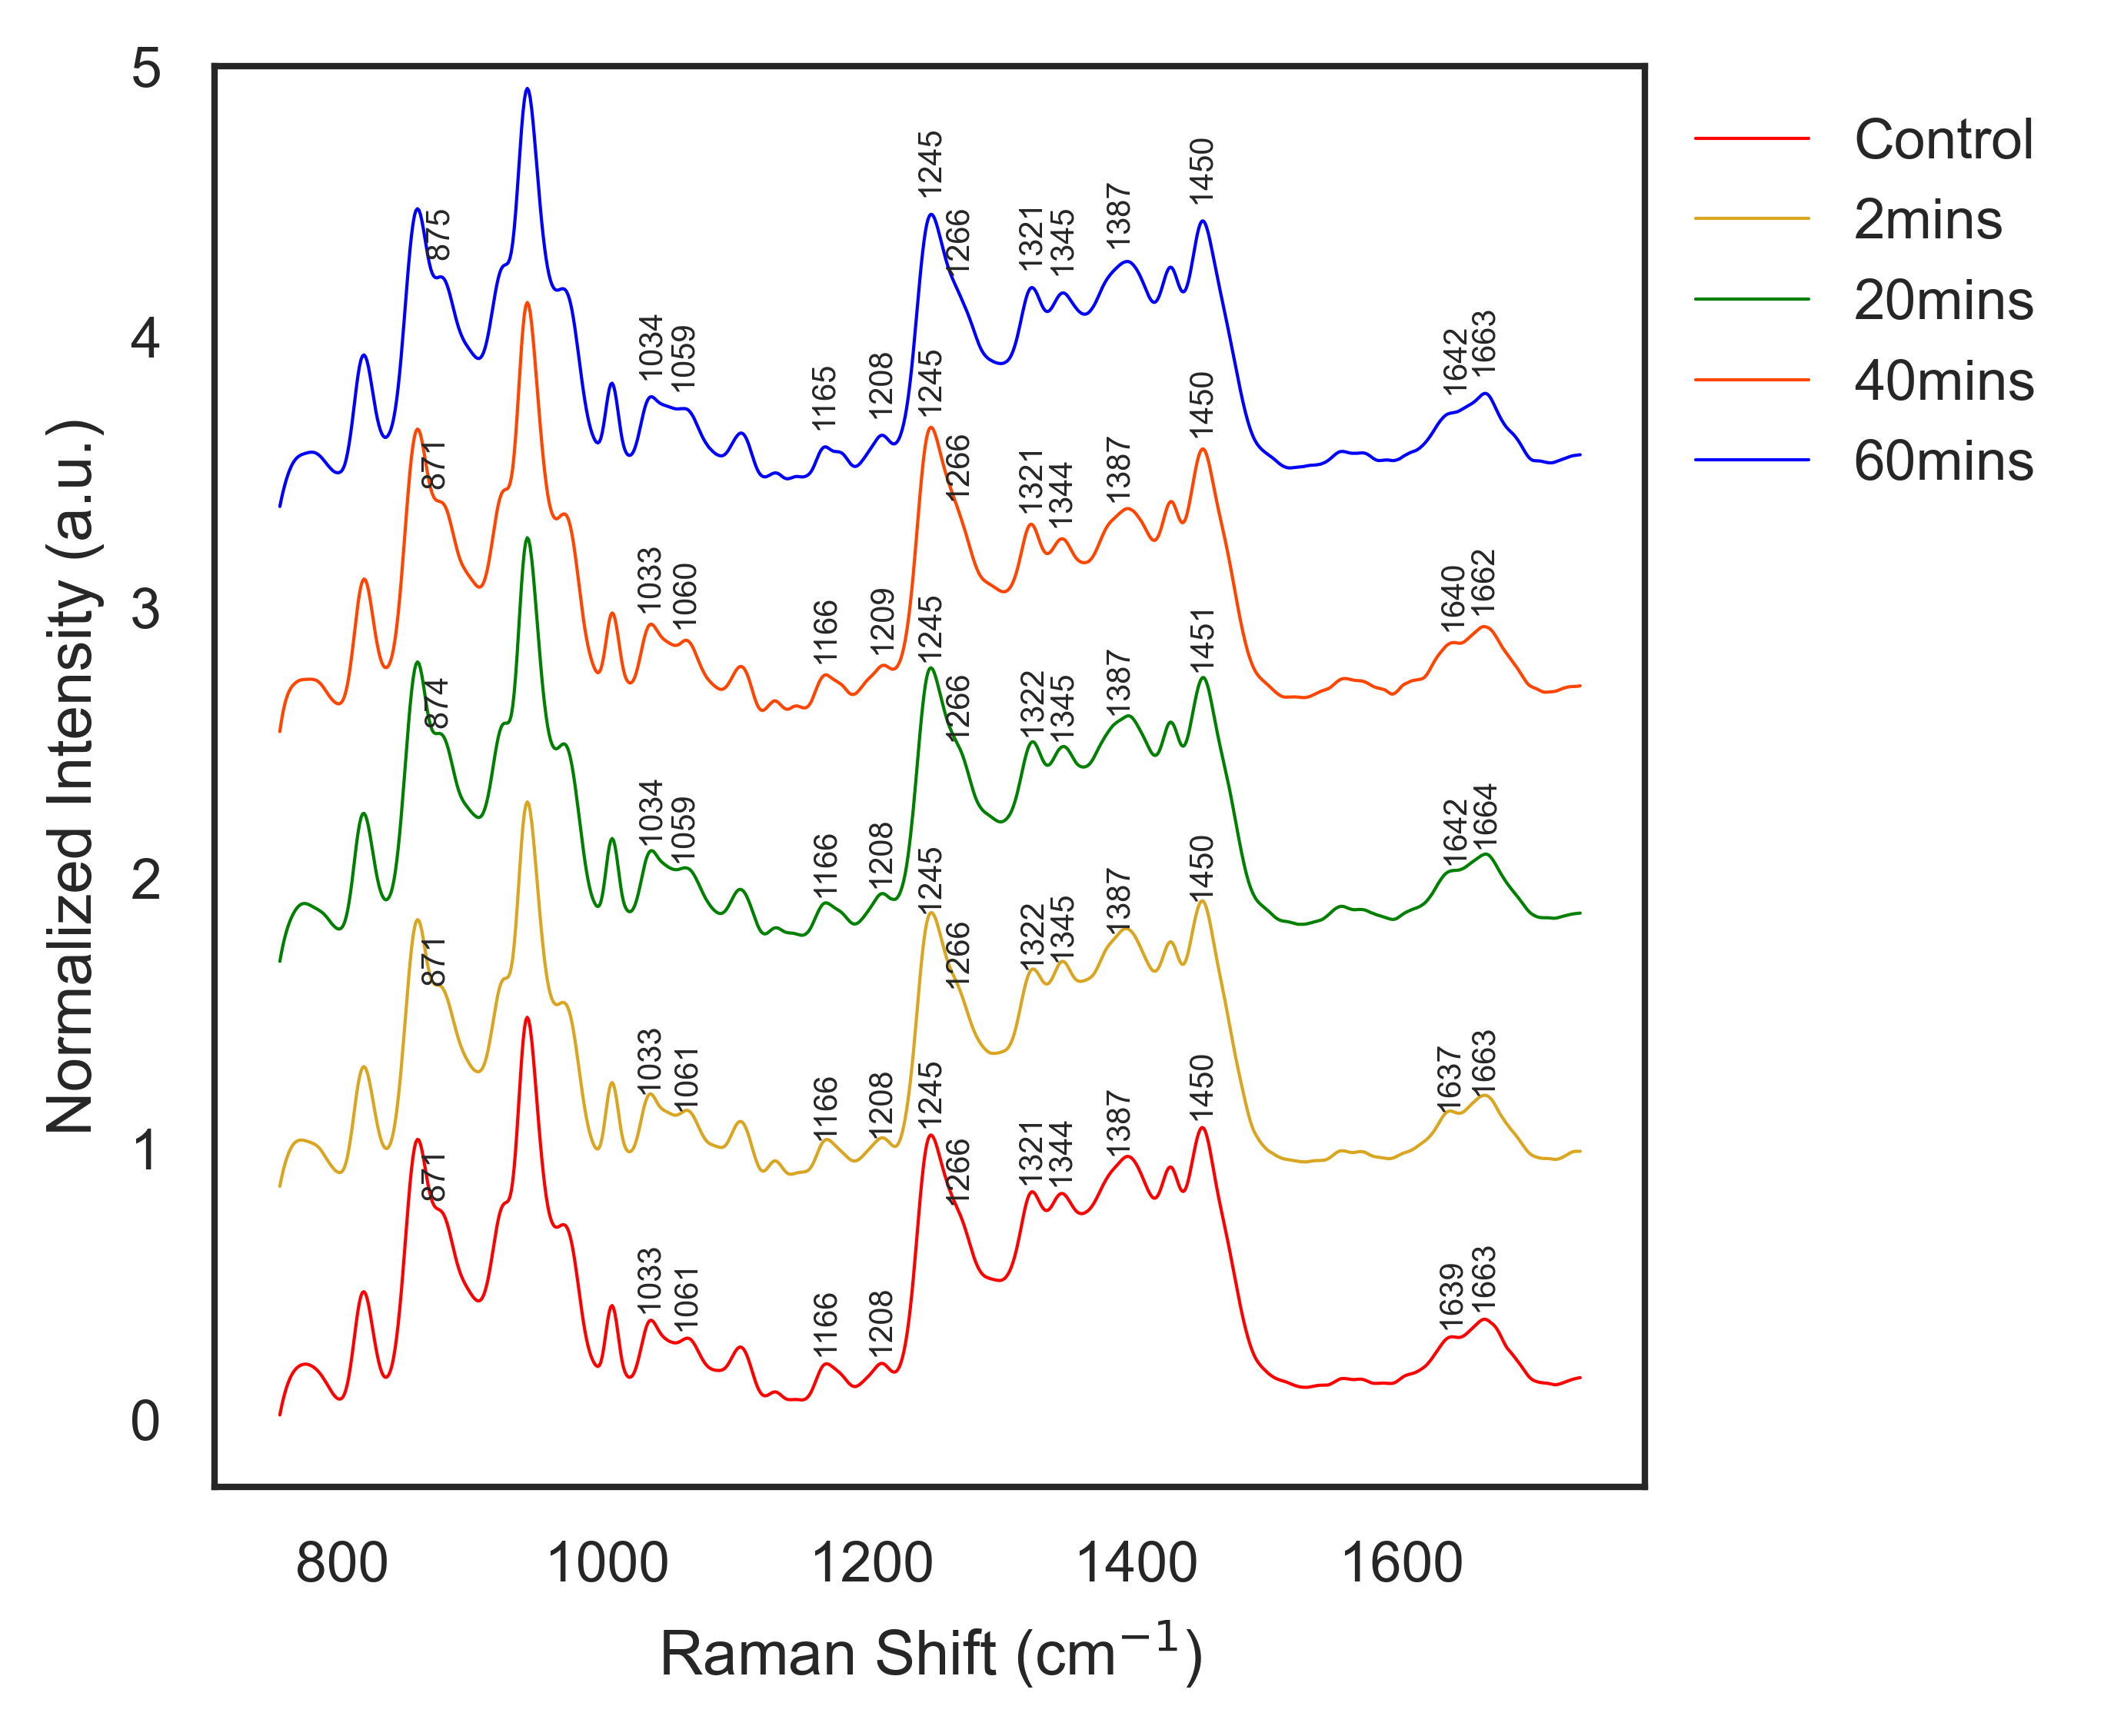

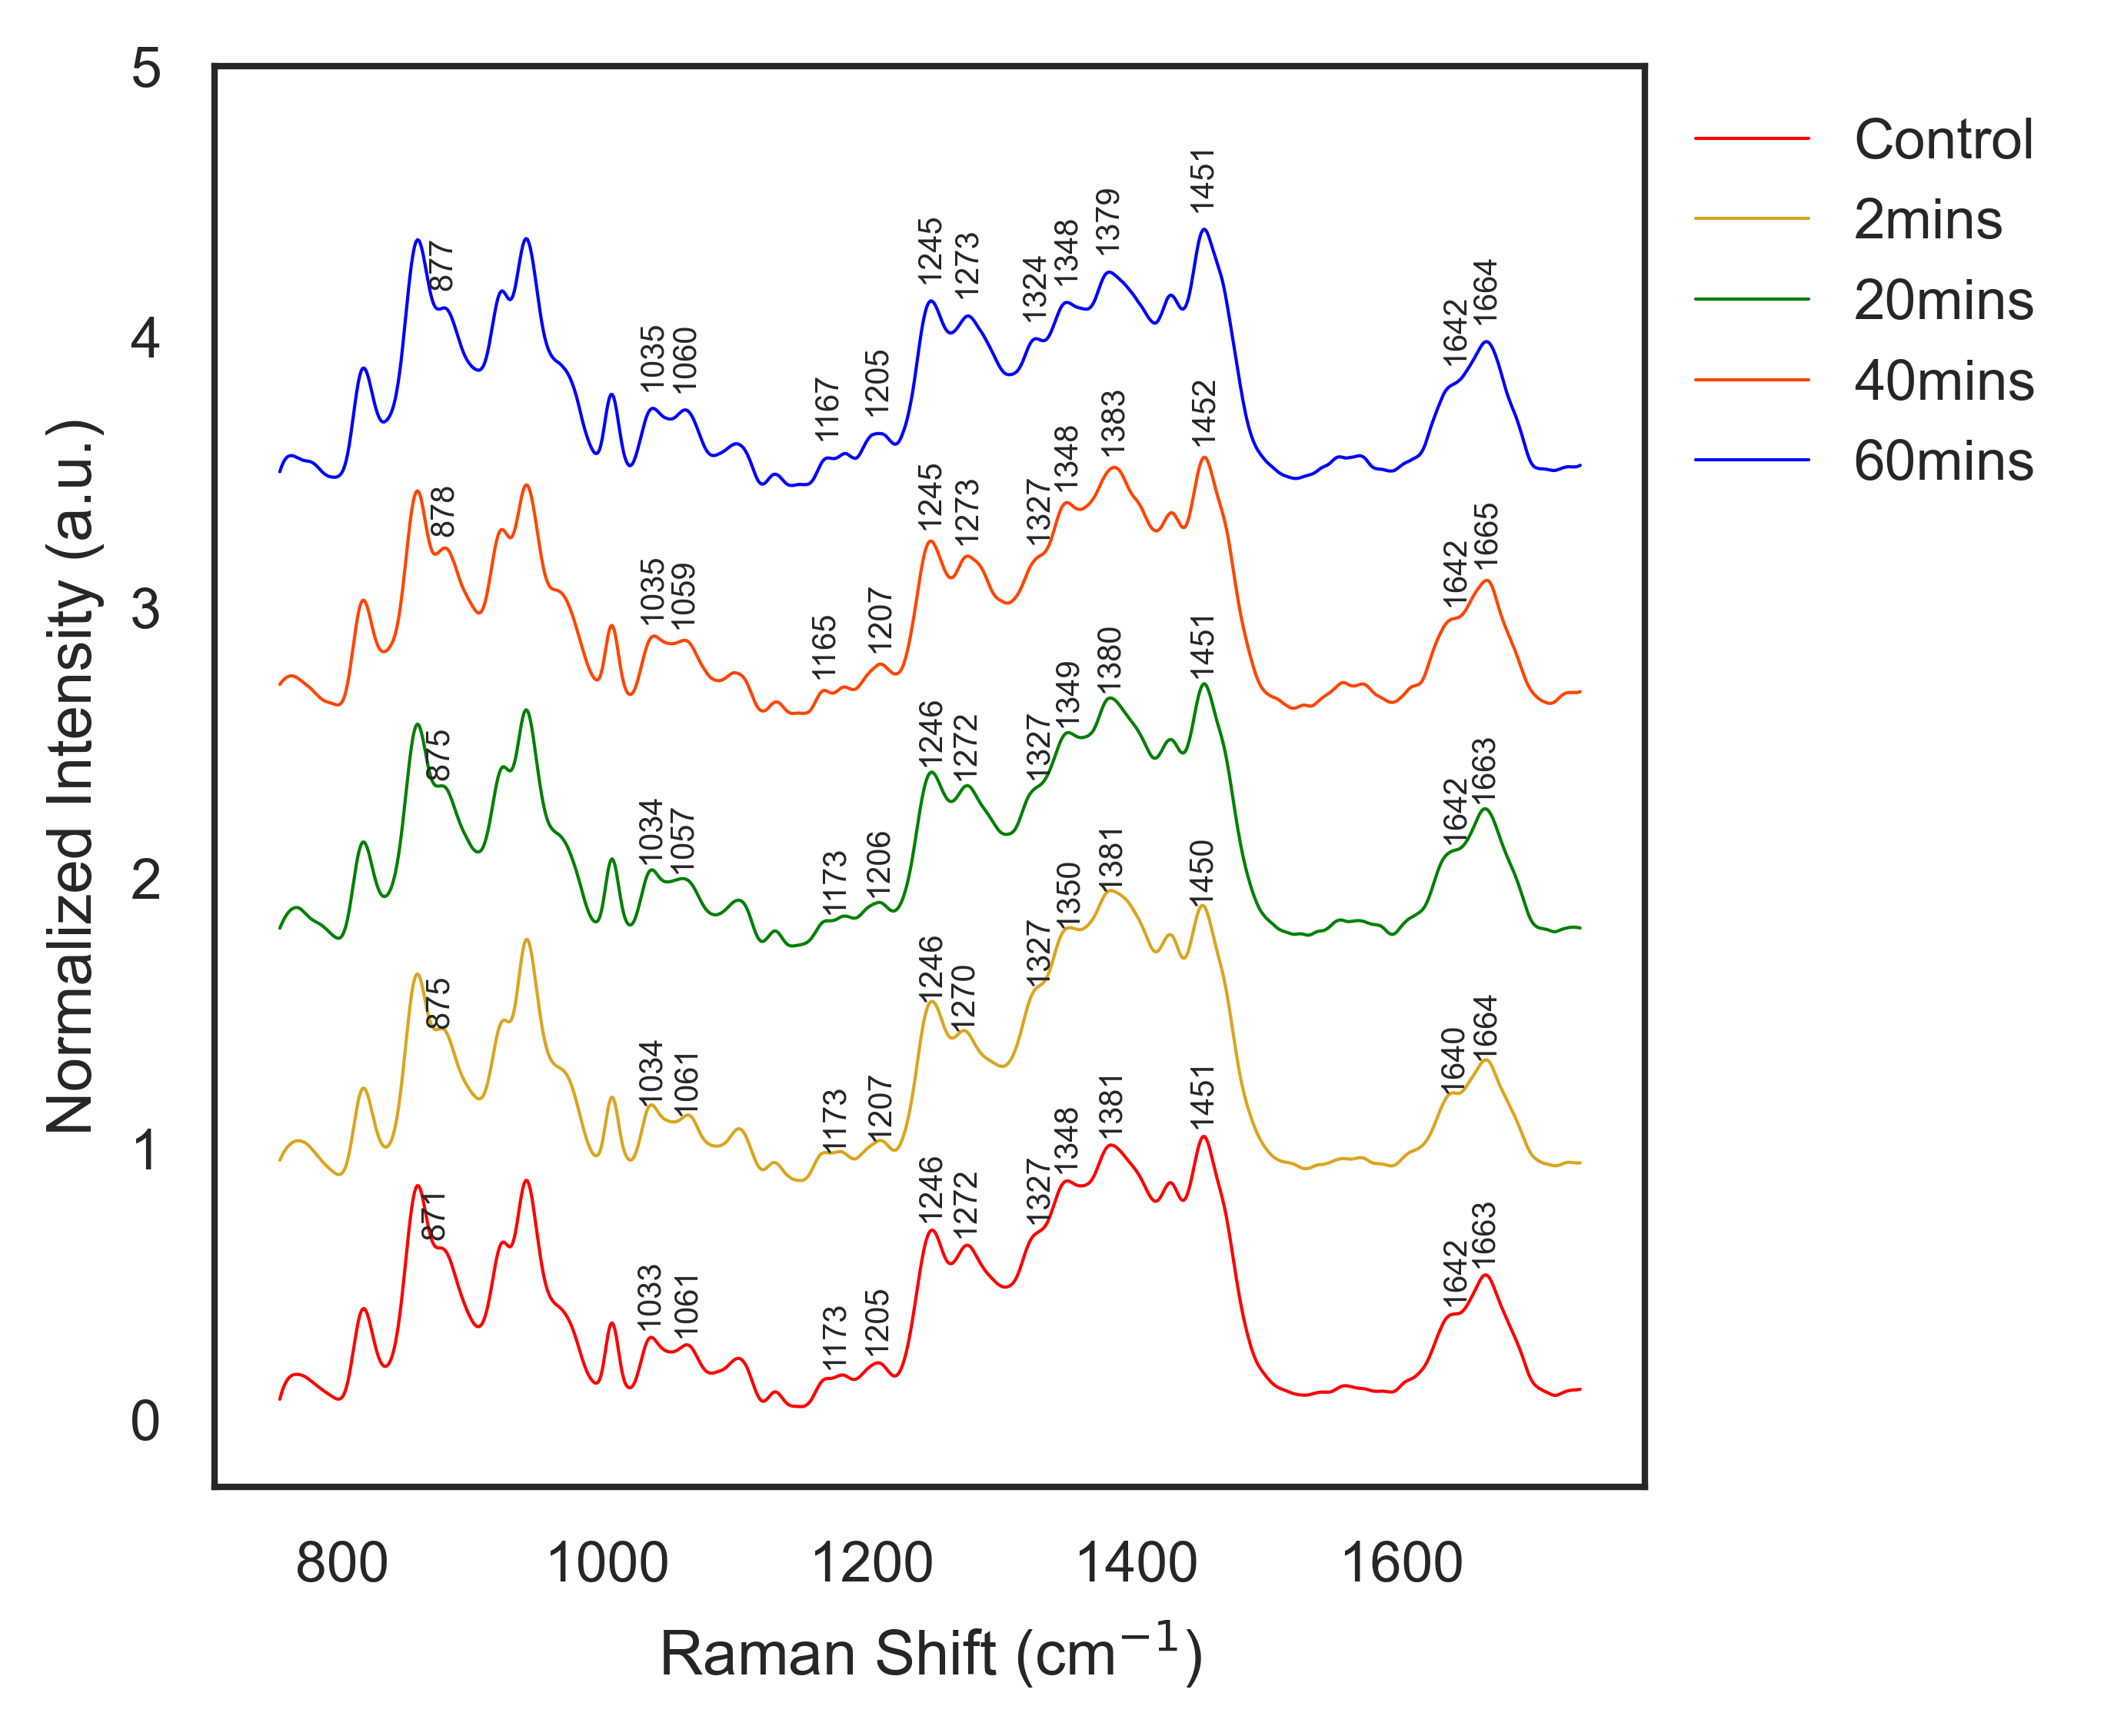

In [159]:
### Diference from singular control

sns.set_theme(style = 'white', context = 'paper')
col_map = ['orange', 'goldenrod','green', 'orangered', 'blue', 'k']
#for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
for j in ['Orth', 'Para']:#
    sub = df_mean1[(df_mean1['orient'] == j)].reset_index(drop=True)
    sub['trt_time'] = pd.Categorical(sub['trt_time'], categories= ['0mins',   '2mins',  '20mins',     '40mins',    '60mins',  '24h',        
    '2mins24h',  '20mins24h',  '40mins24h', '60mins24h'])
    sub = sub.sort_values('trt_time').reset_index(drop=True)
    #sub_ctrl = sub[(sub['sample'] == 'Ctrl') & (sub['orient'] == j)]
    #diff = sub.iloc[1:, 5:].values - sub.iloc[0, 5:].values

    plt.figure(figsize = (4, 4), dpi = 600)
    sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = .5
        )
    for b in range(1, 5):
        #plt.figure(figsize = (6, 4), dpi = 300)
        '''if b == 3:
            sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub.iloc[b, 5:] + 2, #.values +.35,
                label = sub['trt_time'][b],
                color = col_map[b],
                lw = .5,
                #hue = 'trt_time'
            #palette=col_map
            )
        else:'''
        sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub.iloc[b, 5:] +(b/1.19), #.values +.35,
                label = sub['trt_time'][b],
                color = col_map[b],
                lw = .5,
                #hue = 'trt_time'
            #palette=col_map
            )
        
    
    
    '''sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )'''
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
    plt.legend(bbox_to_anchor = (1, 1), frameon = False)
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.ylabel("Normalized Intensity (a.u.)")
    plt.ylim(-.25, 5)
    #plt.axhline(0, lw = .5, color = 'black')

    ctrs = [ 876, 1321,1245, 1270,  1381, 1033, 1062, 1167, 1207, 1344, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 1321,857,940, 975,1100, 1127, 1245, 1270,  1381, 1426, 
    for c in ctrs:
        for b in range(0, 5):
            mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6)

            loc_idx = sub.columns[5:][mask]
            peak_idx = sub.iloc[b, 5:][mask]

            idx_max = np.argmax(peak_idx)
            peak_wl = loc_idx[idx_max]
            int_val = peak_idx.values[idx_max]
                    #print(int_val)
            if b == 0:
                        plt.text(peak_wl + 10, int_val + .05,#.3 * (len(sub) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')
            else:
                        plt.text(peak_wl+10, int_val + b/1.16,#.5 * (len(sub) + 0.3),
                            f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')

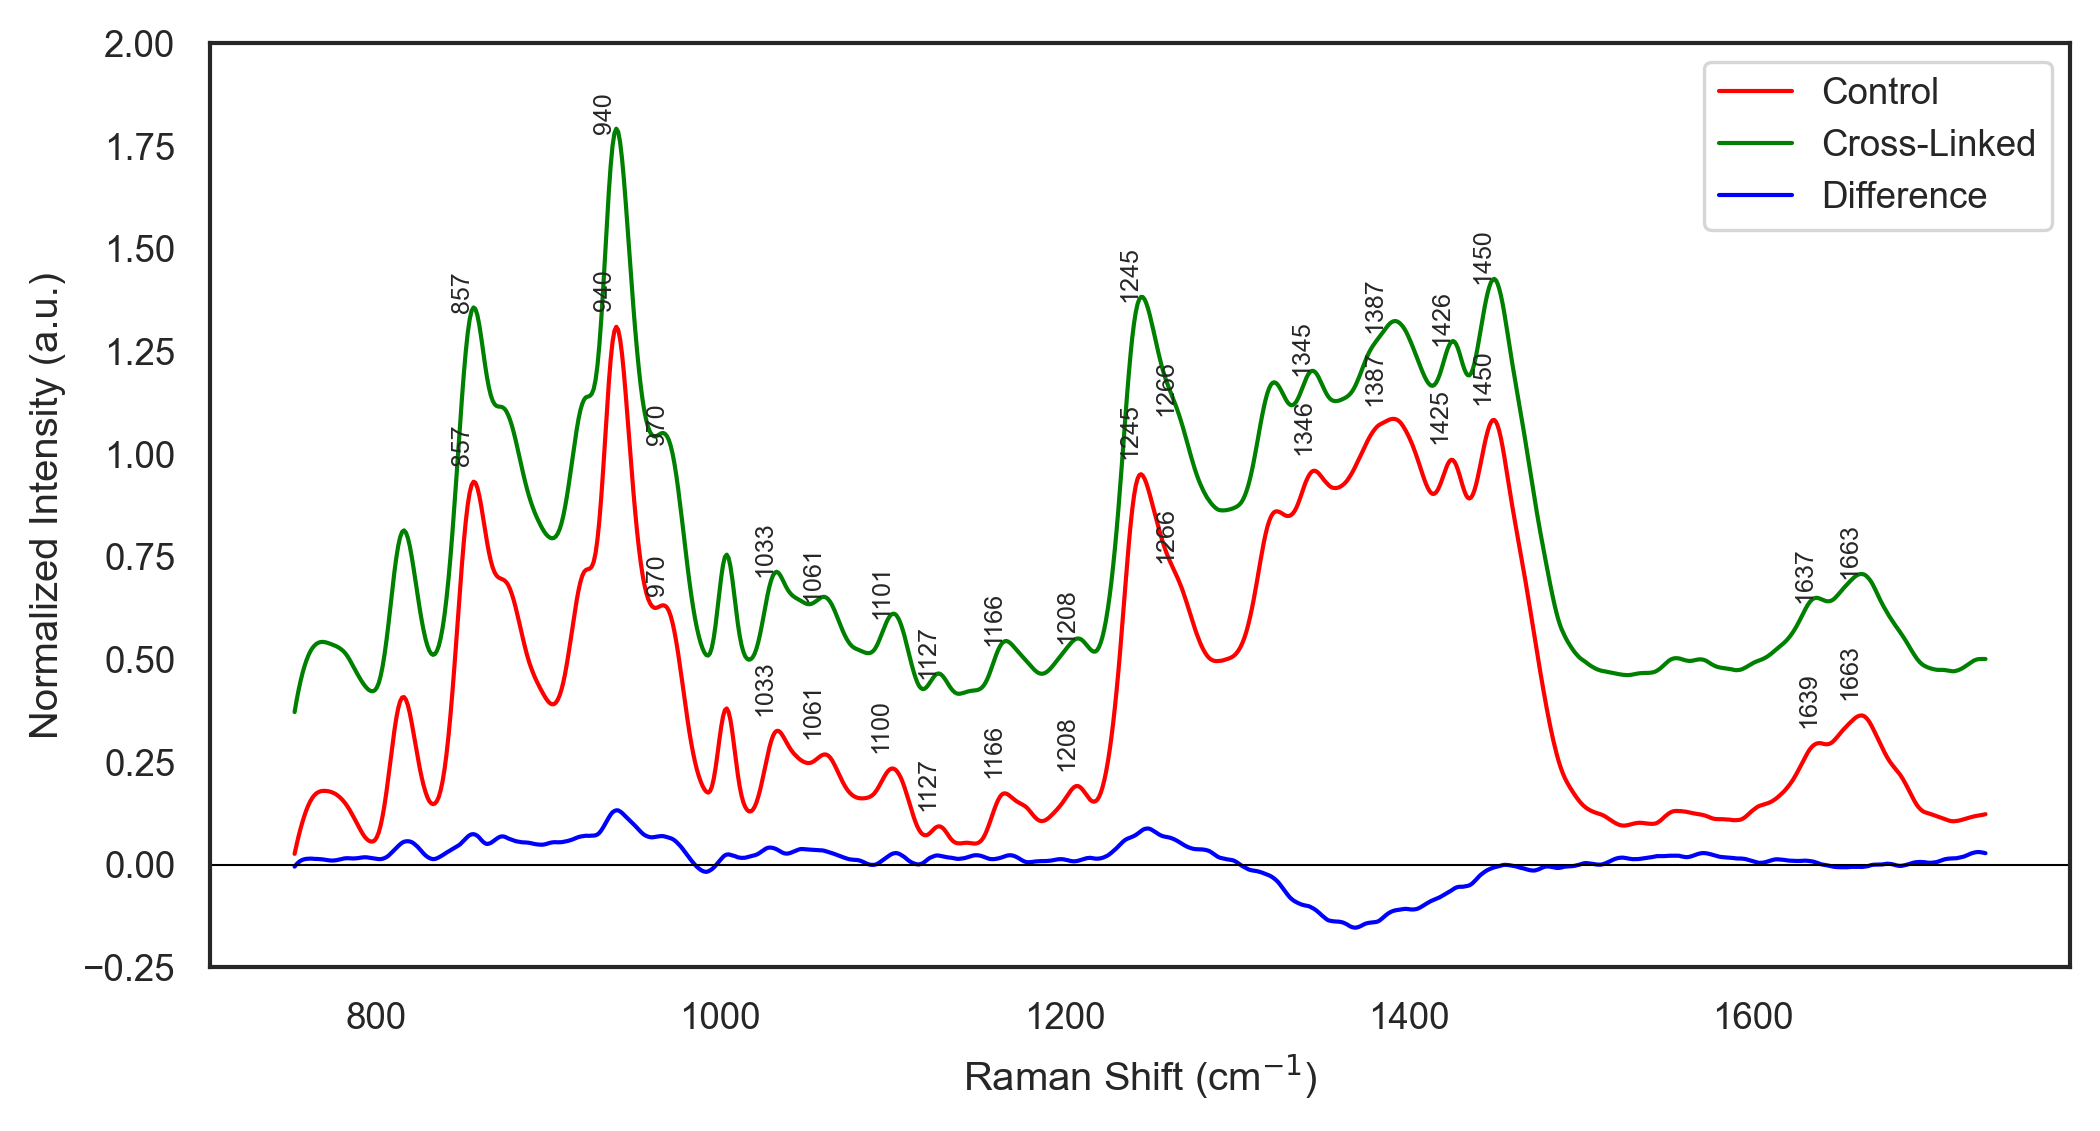

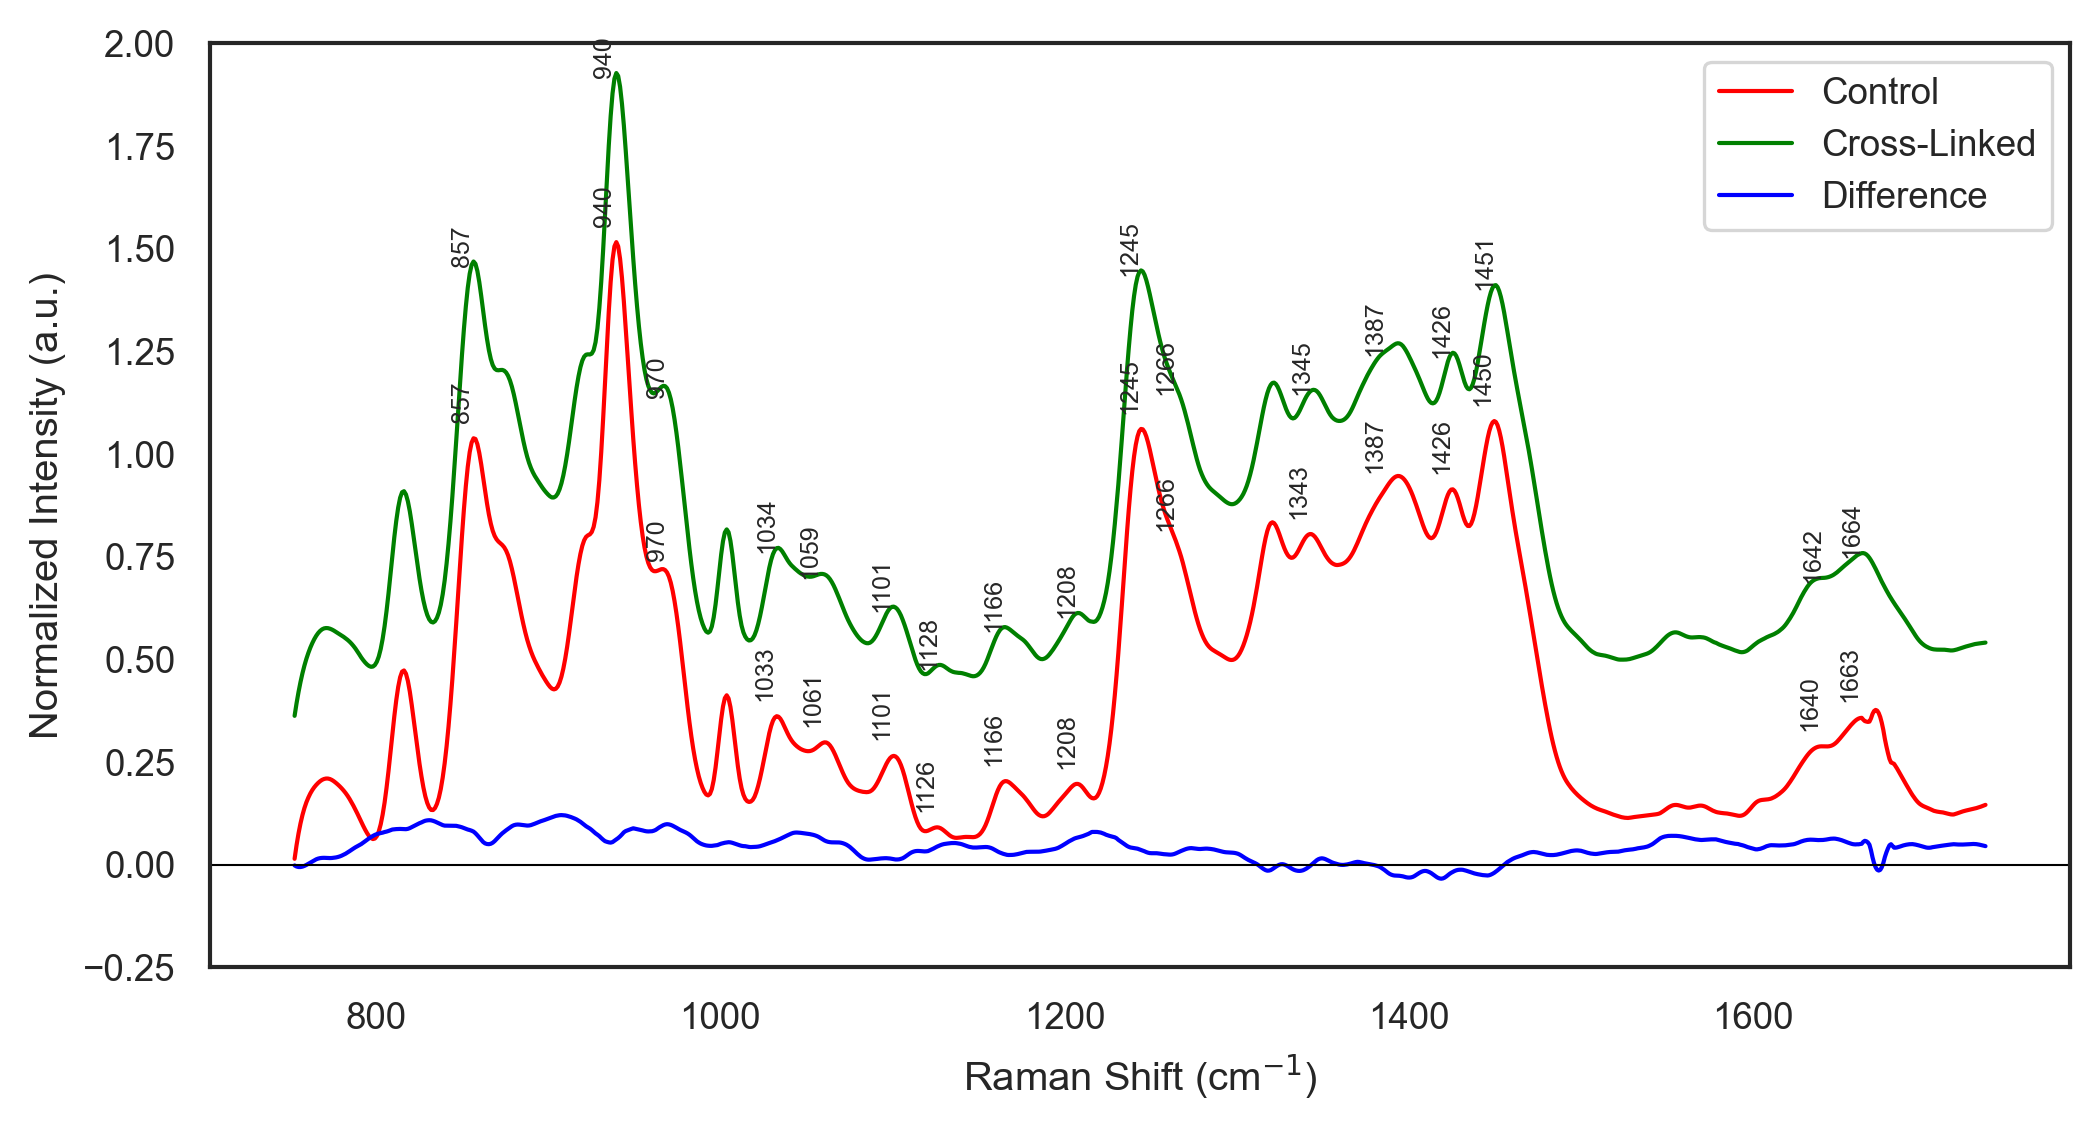

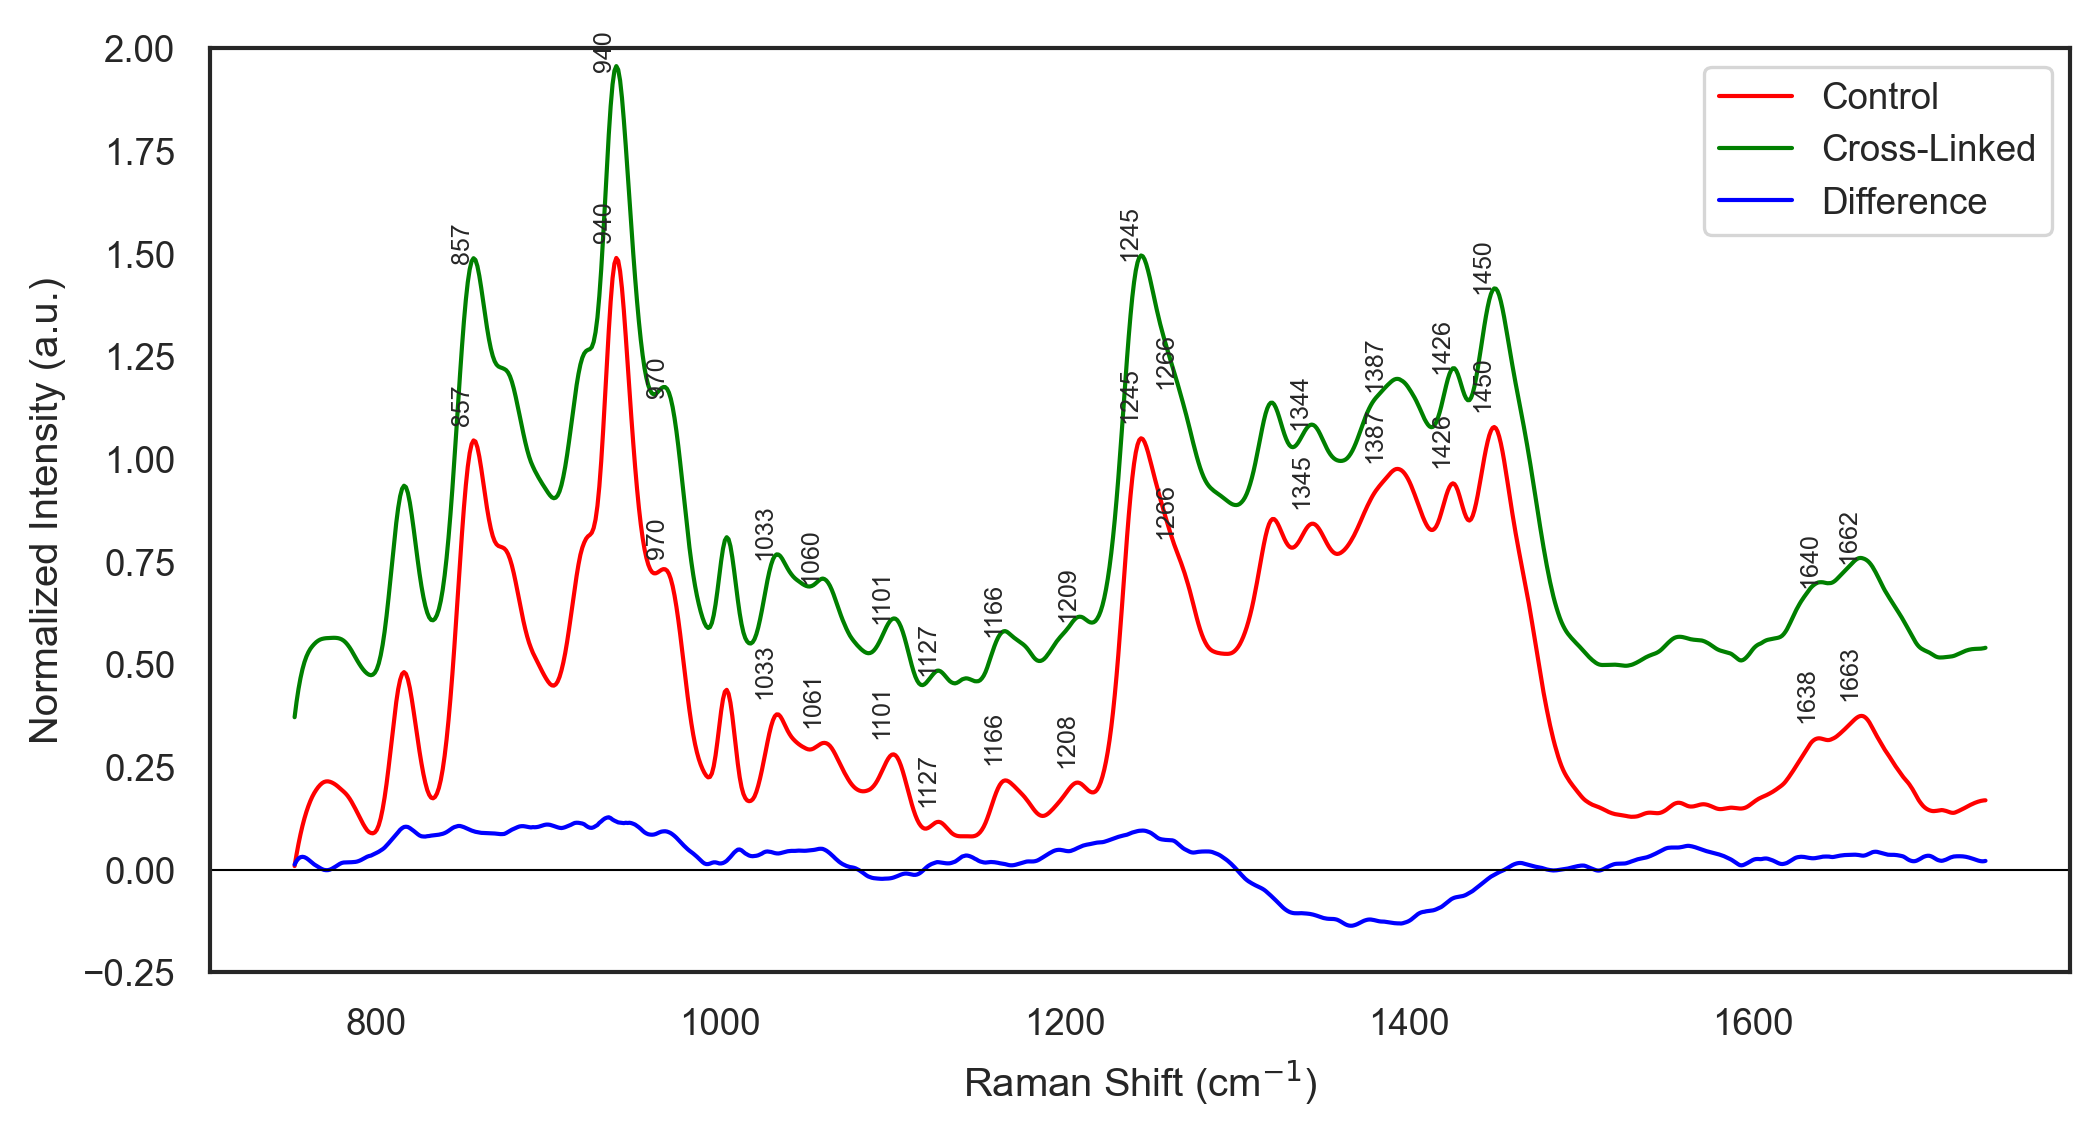

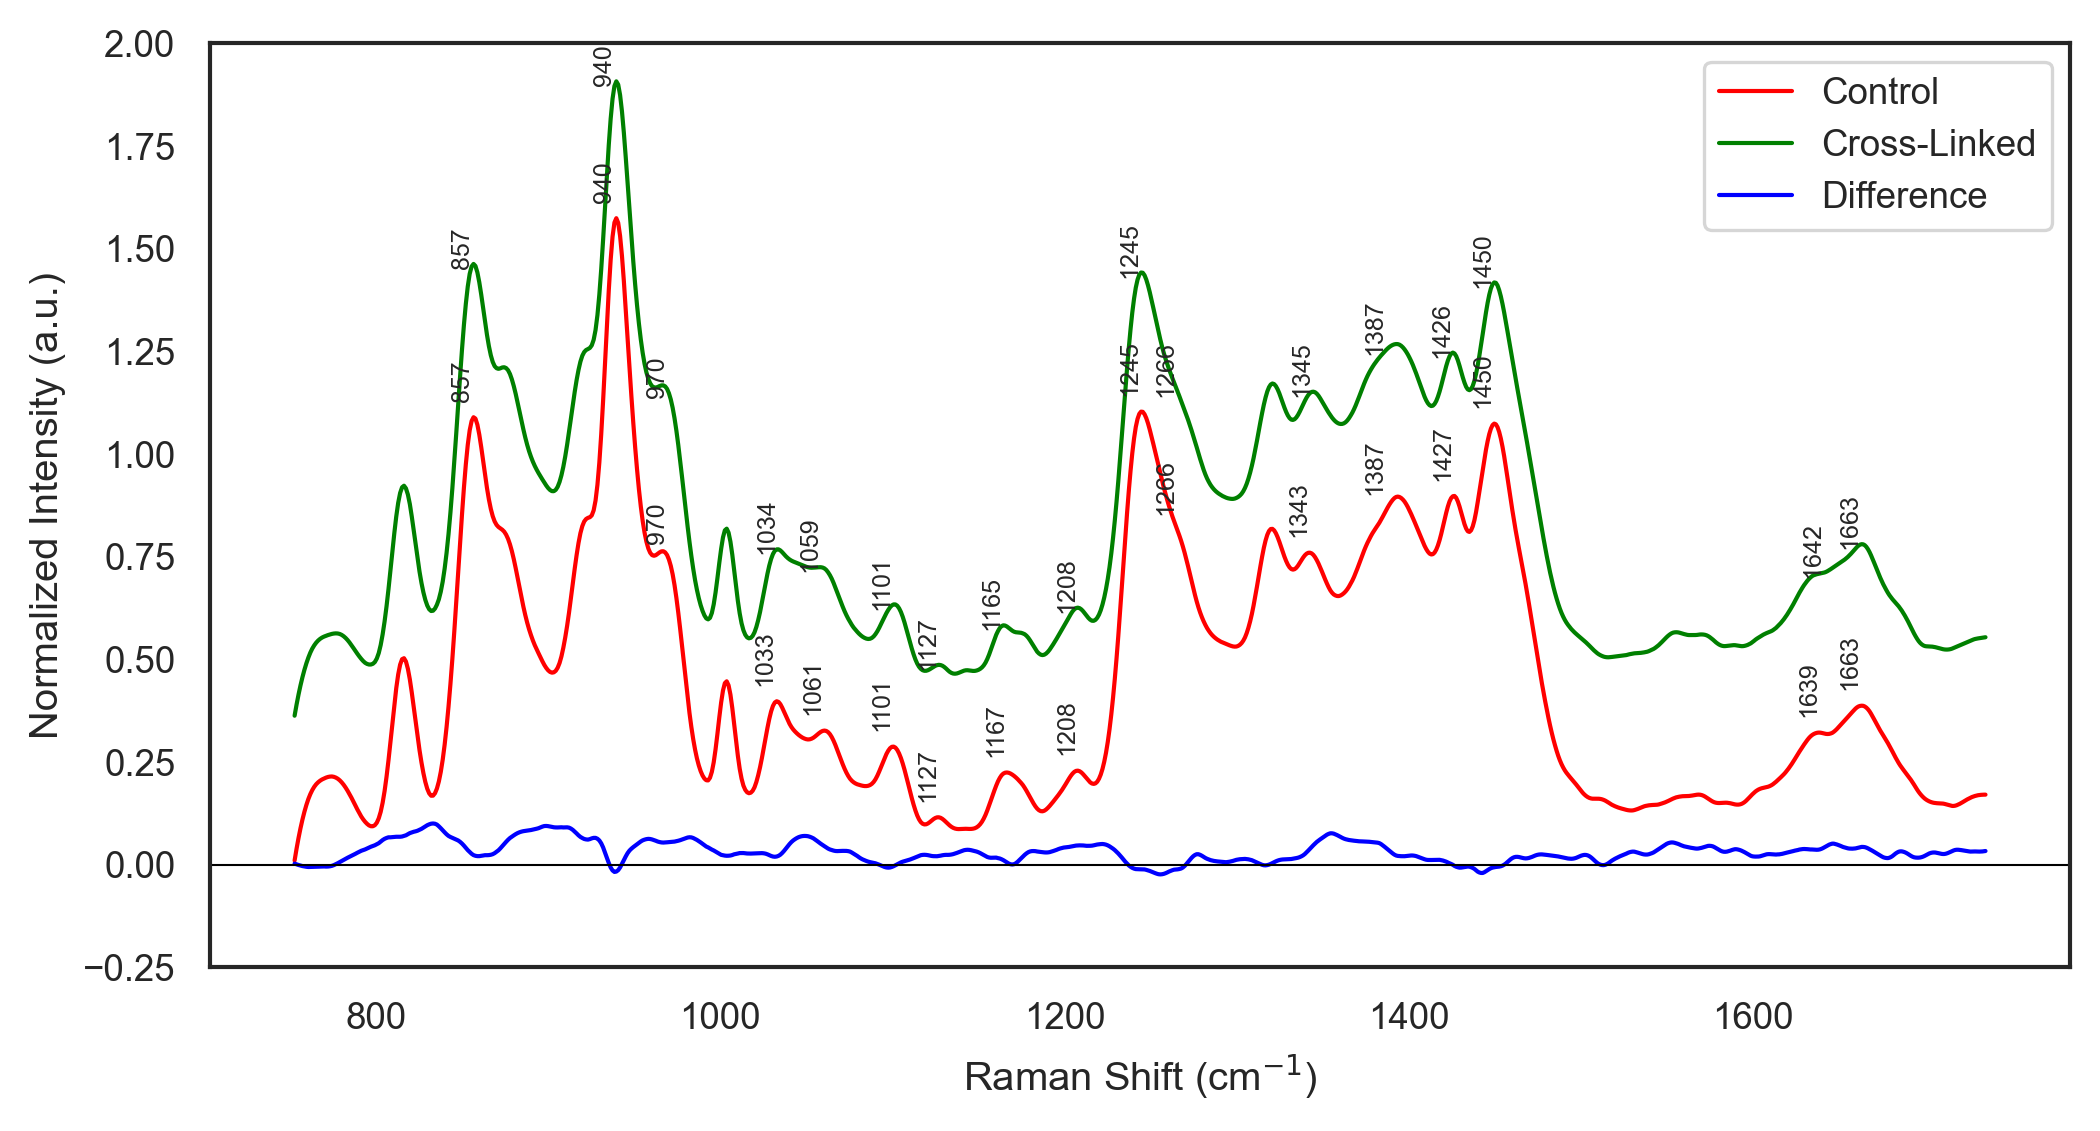

In [ ]:
### Diference within each time point

sns.set_theme(style = 'white', context = 'paper')
for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
    for j in ['Orth', 'Para']:#
        sub = df_mean[(df_mean['trt_time'] == i) & (df_mean['orient'] == j)]
        diff = sub.iloc[1, 5:].values - sub.iloc[0, 5:].values

        plt.figure(figsize = (8, 4), dpi = 300)
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = 1
        )
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[1, 5:].values +.35,
            label = 'Cross-Linked',
            color = 'green',
            lw = 1
        )
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
        plt.legend(bbox_to_anchor = (1, 1))
        plt.xlabel("Raman Shift (cm$^{-1}$)")
        plt.ylabel("Normalized Intensity (a.u.)")
        plt.ylim(-.25, 2)
        plt.axhline(0, lw = .5, color = 'black')

        ctrs = [857,940, 975,1033, 1062, 1100, 1127, 1167, 1207, 1245, 1270,  1344, 1381, 1426, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 1321,
        for c in ctrs:
            for b in [0, 1]:
                mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6)

                loc_idx = sub.columns[5:][mask]
                peak_idx = sub.iloc[b, 5:][mask]

                idx_max = np.argmax(peak_idx)
                peak_wl = loc_idx[idx_max]
                int_val = peak_idx.values[idx_max]
                #print(int_val)
                if b == 0:
                    plt.text(peak_wl, int_val + .05,#.3 * (len(sub) + 0.3),
                    f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
                else:
                    plt.text(peak_wl, int_val + .35,#.5 * (len(sub) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')

In [147]:
scores = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\Para_24h_CvT24_score.csv')
scores.head()

,Label,sample,trt_time,orient,spectra_num,details,Class,Cross-validation Sets,Scores on PC 1 (16.68%),Scores on PC 2 (3.47%),Scores on PC 3 (3.34%),Scores on PC 4 (2.85%),Scores on PC 5 (2.70%),Q Residuals (70.95%),Hotelling T^2 (29.05%),Q Residuals Reduced (p=0.950) (70.95%),Hotelling T^2 Reduced (p=0.950) (29.05%),KNN Score Distance (k=3)
0,20250616,Ctrl,24h,Para,1,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 1,-0.142166,0.051021,-0.038786,0.103689,-0.021978,0.077673,5.924349,0.762352,0.465848,0.562446
1,20250616,Ctrl,24h,Para,2,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 2,-0.094782,0.064816,-0.010636,0.013321,0.049432,0.081452,2.558723,0.799443,0.201199,0.392083
2,20250616,Ctrl,24h,Para,3,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 3,-0.146891,0.045722,-0.096913,0.116949,-0.135820,0.062824,15.203511,0.616612,1.195494,0.928750
3,20250616,Ctrl,24h,Para,4,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 4,-0.122711,-0.113608,0.080634,0.004964,-0.011502,0.069529,6.163354,0.682419,0.484641,0.400347
4,20250616,Ctrl,24h,Para,5,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 5,-0.135972,0.033109,0.060663,-0.162947,0.029674,0.063365,11.330735,0.621923,0.890967,0.849635


In [148]:
scores_mean = scores.groupby(['Class']).mean(numeric_only = True)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_16728\506242401.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_16728\506242401.py:2: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


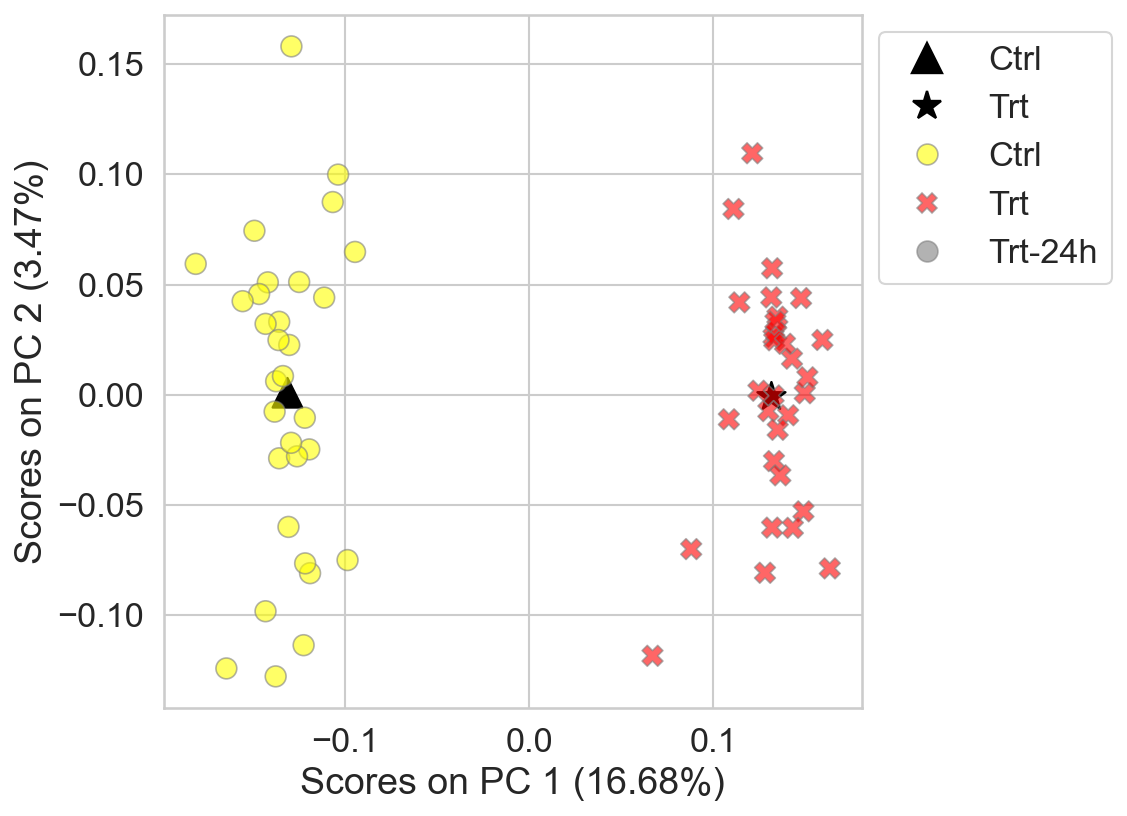

In [159]:
plt.figure(figsize = (6,6), dpi = 150)
sns.scatterplot(
    x = 'Scores on PC 1 (16.68%)',
    y = 'Scores on PC 2 (3.47%)',
    data = scores_mean,
    hue = 'Class',
    s=200,
    palette = ['black', 'black', 'gray'], #['yellow', 'red', 'gray'],
    style='Class',
    markers = ['^', '*', 'o'],
    edgecolor = 'black'
)
sns.scatterplot(
    x = 'Scores on PC 1 (16.68%)',
    y = 'Scores on PC 2 (3.47%)',
    data = scores,
    hue = 'Class',
    hue_order=['Ctrl', 'Trt', 'Trt-24h'],
    s=100,
    palette = ['yellow', 'red', 'gray'],
    style='Class',
    #markers = ['^', '*', 'o'],
    edgecolor = 'grey',
    alpha = .6
)
plt.legend(bbox_to_anchor = (1, 1))